In [1]:
import numpy as np, numpy.linalg as npLA
from numpy.linalg import matrix_power
from numpy.testing import assert_allclose, assert_array_less, assert_

from scipy import linalg as LA
from scipy.linalg import inv, det, expm

import matplotlib.pyplot as plt

In [2]:
from utility import *

%load_ext autoreload
%autoreload 1
%aimport utility

In [3]:
# Without set_, it can be used as a context manager as well.
# formatter={'float_kind':'{:_.1f}'.format}
np.set_printoptions(precision=1, suppress=True)

# Create my chosen array

In [4]:
def create_a_square_invertible_array():
    """Invertible (M == N)"""
    return np.array([[1, 2, 1],
                     [3, 8, 1],
                     [0, 4, 1]])

def create_a_square_singular_array():
    """Singular M == N"""
    return np.array([[1, 1, 4],
                     [2, 2, 5],
                     [3, 3, 6]])

def create_a_Markov_matrix():
    """Markov (M == N)"""
    return np.array([[.1,  .01, .3],
                     [.2,  .99, .3],
                     [.7, 0   , .4]])

def create_a_Jordan_array():
    """Jordan (M == N)"""
    return np.array([[3, 1, 0],
                     [0, 3, 1],
                     [0, 0, 3]])

def create_a_tall_array():
    """Tall (M > N)"""
    return np.array([[1, 1],
                     [2, 2],
                     [3, 4],
                     [4, 1]])


def create_a_fat_array():
    """Fat (M < N)"""
    return np.array([[1, 2, 3, 4],
                     [1, 2, 4, 1]])

# Differential Equations

def create_a_3d_array_leading_to_stability_in_discrete_diff_eq():
    """A 3 by 3 array for a discrete differential equation that leads to stability"""
    return np.array([[ 0.1, 0  ,  0.5],
                     [ 0  , 0.1,  0  ],
                     [-0.5, 0  , -0.1]])

def create_a_3d_array_leading_to_steady_state_in_discrete_diff_eq():
    """A 3 by 3 array for a discrete differential equation that leads to steady state"""
    return np.array([[ 0.2, 0  ,  1  ],
                     [ 0  , 0.2,  0  ],
                     [-1  , 0  , -0.1]])

def create_a_3d_array_blowing_up_in_discrete_diff_eq():
    """A 3 by 3 array for a discrete differential equation that blows up"""
    return np.array([[ 1, 1  ,  1  ],
                     [-1, 0.5,  0  ],
                     [-1, 0  , -0.5]])

def create_a_3d_array_leading_to_stability_in_continuous_diff_eq():
    """A 3 by 3 array for a continuous differential equation that leads to stability"""
    return np.array([[-0.8, 1  ,  1  ],
                     [-1  ,-0.6,  1  ],
                     [-1  , 1  , -0.7]])

def create_a_3d_array_leading_to_steady_state_in_continuous_diff_eq():
    """A 3 by 3 array for a continuous differential equation that leads to steady state"""
    return np.array([[-0.6, 1  ,  1  ],
                     [-1  ,-0.5,  1  ],
                     [-1  , 1  , -0.6]])

def create_a_3d_array_blowing_up_in_continuous_diff_eq():
    """A 3 by 3 array for a continuous differential equation that blows up"""
    return np.array([[ 1, 1  ,  1  ],
                     [-1, 0.5,  0  ],
                     [-1, 0  , -0.5]])

def create_a_2d_array_leading_to_stability_in_discrete_diff_eq():
    """A 2 by 2 array for a discrete differential equation that leads to stability"""
    return np.array([[ 0.1, 0.5],
                     [-0.5, 0.2]])

def create_a_2d_array_leading_to_steady_state_in_discrete_diff_eq():
    """A 2 by 2 array for a discrete differential equation that leads to steady state"""
    return np.array([[ 0.8, 0.5],
                     [-0.5, 0.9]])

def create_a_2d_array_blowing_up_in_discrete_diff_eq():
    """A 2 by 2 array for a discrete differential equation that blows up"""
    return np.array([[ 0.5, 1  ],
                     [-1  , 0.8]])

def create_a_2d_array_leading_to_stability_in_continuous_diff_eq():
    """A 2 by 2 array for a continuous differential equation that leads to stability"""
    return np.array([[-0.3,  1  ],
                     [-1  , -0.1]])

def create_a_2d_array_leading_to_steady_state_in_continuous_diff_eq():
    """A 2 by 2 array for a continuous differential equation that leads to steady state"""
    return np.array([[ 0,  1  ],
                     [-1, -0.1]])

def create_a_2d_array_blowing_up_in_continuous_diff_eq():
    """A 2 by 2 array for a continuous differential equation that blows up"""
    return np.array([[ 0.3, 1  ],
                     [-1  , 0.1]])

def create_my_array():
    """The array I wish to see its attributes throughout the majority of cells. Feel free to change it!"""
    # return create_a_square_invertible_array()
    return create_a_Markov_matrix()

A = create_my_array()
print(A)

[[0.1 0.  0.3]
 [0.2 1.  0.3]
 [0.7 0.  0.4]]


# Basic operations

## Transpose

### Matrix (2D array)

In [5]:
A = np.arange(1, 5).reshape((2, 2))
print(A)

[[1 2]
 [3 4]]


In [6]:
print(A.T)

[[1 3]
 [2 4]]


### Vector (1D array)

In [7]:
b = np.arange(3)
print(b)

[0 1 2]


In [8]:
print(b.T)

[0 1 2]


A 1D array is the same as its transpose.


1D arrays will automatically transform to (perhaps transpose) 2D ones when they are on either side of @ functions.

### Vector (2D array)

In [9]:
x = np.arange(3).reshape((1, 3))
print(x)

[[0 1 2]]


In [10]:
print(x.T)

[[0]
 [1]
 [2]]


## Inverse

In [11]:
A = np.array([[1, 2],
              [3, 1]])
Ai = LA.inv(A)
print(Ai)

[[-0.2  0.4]
 [ 0.6 -0.2]]


# Decompositions

## LU

In [12]:
A = create_my_array()
print(A)

[[0.1 0.  0.3]
 [0.2 1.  0.3]
 [0.7 0.  0.4]]


In [13]:
P, L, U = LA.lu(A)
print('P', P, '', 'L', L, '', 'U', U, sep='\n')

P
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]

L
[[1.  0.  0. ]
 [0.3 1.  0. ]
 [0.1 0.  1. ]]

U
[[0.7 0.  0.4]
 [0.  1.  0.2]
 [0.  0.  0.2]]


## QR

In [14]:
A = create_my_array()
print(A)

[[0.1 0.  0.3]
 [0.2 1.  0.3]
 [0.7 0.  0.4]]


In [15]:
Q, R = LA.qr(A)
print('Q', Q, '', 'R', R, sep='\n')

Q
[[-0.1  0.  -1. ]
 [-0.3 -1.   0. ]
 [-1.   0.3  0.1]]

R
[[-0.7 -0.3 -0.5]
 [ 0.  -1.  -0.2]
 [ 0.   0.  -0.2]]


## Diagonalization (Eigendecomposition)

In [16]:
A = create_my_array()
print(A)

[[0.1 0.  0.3]
 [0.2 1.  0.3]
 [0.7 0.  0.4]]


In [17]:
la, S = npLA.eig(A)
print('la', la, '', 'S', S, sep='\n')

la
[-0.2  0.7  1. ]

S
[[ 0.7 -0.3 -0. ]
 [ 0.1  0.8 -1. ]
 [-0.7 -0.5 -0. ]]


In [18]:
print(np.diagflat(la))

[[-0.2  0.   0. ]
 [ 0.   0.7  0. ]
 [ 0.   0.   1. ]]


In [19]:
print(S @ np.diagflat(la) @ inv(S))

[[0.1 0.  0.3]
 [0.2 1.  0.3]
 [0.7 0.  0.4]]


# Subspaces

In [20]:
A = create_my_array()
print(A)

[[0.1 0.  0.3]
 [0.2 1.  0.3]
 [0.7 0.  0.4]]


## Column Space C(A)

(Using SVD, Orthonormal basis)

In [21]:
col_sp_A_orthonormal_basis_by_SVD = LA.orth(A)
print(col_sp_A_orthonormal_basis_by_SVD)

[[-0.2  0.2 -1. ]
 [-0.9 -0.5  0. ]
 [-0.4  0.9  0.3]]


### Manually

#### QR

##### Orthonormal basis

In [22]:
Q, R, P = LA.qr(A, pivoting=True)
rank_A = npLA.matrix_rank(A)
print('Q', Q, '', 'R', R, '', 'P', P, '', 'rank', rank_A, sep='\n')

Q
[[-0.   0.1 -1. ]
 [-1.  -0.   0. ]
 [-0.   1.   0.1]]

R
[[-1.  -0.2 -0.3]
 [ 0.   0.7  0.4]
 [ 0.   0.  -0.2]]

P
[1 0 2]

rank
3


In [23]:
col_sp_A_orthonormal_basis_by_QR = Q[:, :rank_A]
print(col_sp_A_orthonormal_basis_by_QR)

[[-0.   0.1 -1. ]
 [-1.  -0.   0. ]
 [-0.   1.   0.1]]


##### Independent columns

In [24]:
Q, R = LA.qr(A)
print('Q', Q, '', 'R', R, '', 'rank', rank_A, sep='\n')

Q
[[-0.1  0.  -1. ]
 [-0.3 -1.   0. ]
 [-1.   0.3  0.1]]

R
[[-0.7 -0.3 -0.5]
 [ 0.  -1.  -0.2]
 [ 0.   0.  -0.2]]

rank
3


In [25]:
def obtain_unique_indices_of_first_nonzero_col_in_each_row(U_resulted_by_decomposition: np.ndarray) -> list:
    # I should first convert all the "-0." to "0." so that nonzero() can find them.
    U_copy = U_resulted_by_decomposition.copy()
    U_copy[abs(U_copy) < 1.e-7] = 0

    # Because some rows in U may not have even one nonzero element,
    # I have to find the index for the first one in two steps.
    index_of_all_nonzero_cols_in_each_row = (
        [U_copy[i, :].nonzero()[0] for i in range(U_copy.shape[0])]
    )

    index_of_first_nonzero_col_in_each_row = (
        [indices[0] for indices in index_of_all_nonzero_cols_in_each_row
         if len(indices) > 0]
    )

    # Because two rows or more may have the same indices for their first nonzero element,
    # I should remove duplicates.
    unique_indices = sorted(list(set(index_of_first_nonzero_col_in_each_row)))
    return unique_indices

In [26]:
index_of_linearly_independent_cols_of_A = obtain_unique_indices_of_first_nonzero_col_in_each_row(R)

col_sp_A_independent_columns_by_QR = A[:, index_of_linearly_independent_cols_of_A]

print(col_sp_A_independent_columns_by_QR)

[[0.1 0.  0.3]
 [0.2 1.  0.3]
 [0.7 0.  0.4]]


We can create them by Q and R too:

In [27]:
col_sp_A_independent_columns_by_QR = Q @ R[:, index_of_linearly_independent_cols_of_A]

print(col_sp_A_independent_columns_by_QR)

[[ 0.1  0.   0.3]
 [ 0.2  1.   0.3]
 [ 0.7 -0.   0.4]]


#### LU (Independent columns)

In [28]:
P, L, U = LA.lu(A)
print('P', P, '', 'L', L, '', 'U', U, sep='\n')

P
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]

L
[[1.  0.  0. ]
 [0.3 1.  0. ]
 [0.1 0.  1. ]]

U
[[0.7 0.  0.4]
 [0.  1.  0.2]
 [0.  0.  0.2]]


In [29]:
index_of_linearly_independent_cols_of_A = obtain_unique_indices_of_first_nonzero_col_in_each_row(U)

col_sp_A_independent_columns_by_LU = A[:, index_of_linearly_independent_cols_of_A]

print(col_sp_A_independent_columns_by_LU)

[[0.1 0.  0.3]
 [0.2 1.  0.3]
 [0.7 0.  0.4]]


We can create them by P, L, and U too:

In [30]:
col_sp_A_independent_columns_by_LU = P @ L @ U[:, index_of_linearly_independent_cols_of_A]

print(col_sp_A_independent_columns_by_LU)

[[0.1 0.  0.3]
 [0.2 1.  0.3]
 [0.7 0.  0.4]]


## Null Space N(A)

(Using SVD, Orthonormal basis)

In [31]:
null_sp_A = LA.null_space(A)
print(null_sp_A)

[]


In [32]:
LA.norm(null_sp_A)

0.0

## Row Space C(At)

In [33]:
row_sp_A = LA.orth(A.T)
print(row_sp_A)

[[ 0.4  0.7  0.5]
 [ 0.8 -0.6  0.1]
 [ 0.4  0.4 -0.8]]


## Left Null Space N(At)

In [34]:
left_null_sp_A = LA.null_space(A.T)
print(left_null_sp_A)

[]



# Rank-one matrix

In [35]:
v = np.array([1, 4, 5])
A = np.vstack([v, 2 * v, 3 * v])

print(A)

[[ 1  4  5]
 [ 2  8 10]
 [ 3 12 15]]


In [36]:
npLA.matrix_rank(A)

1

## ?

Why is computing determinant and eigenvalues for rank-one matrices **easy**?

In [37]:
LA.det(A)

0.0

In [38]:
LA.eigvals(A)

array([24.+0.j, -0.+0.j,  0.+0.j])

Because rank-one matrices are _singular_, they have some zero eigenvalues. That's why their determinant is _zero_.

How can we compute the unique eigenvalue that rank-one matrices have?

If I write a matrix as a sum of only rank-one matrices, how can it help with computing eigenvalues for the original matrix?

# Least Squares

In [39]:
A = np.column_stack([np.ones(3), np.arange(1, 4)]).astype('int')
b = np.array([1, 2, 2])
print('A', A, '', 'b', b, sep='\n')

A
[[1 1]
 [1 2]
 [1 3]]

b
[1 2 2]


In [40]:
x_hat, *_ = LA.lstsq(A, b)
print(x_hat)

[0.7 0.5]


The power of `lstsq()` is that it does not need N(A) == 0.

## Manually

In this manual approach, all columns of A should be linearly independent.

In [41]:
At_A = A.T @ A
At_b = A.T @ b
print('At_', At_A, '', 'At_b', At_b, sep='\n')

At_
[[ 3  6]
 [ 6 14]]

At_b
[ 5 11]


In [42]:
x_hat = inv(At_A) @ At_b
print(x_hat)

[0.7 0.5]


Or:

In [43]:
x_hat = LA.solve(At_A, At_b)
print(x_hat)

[0.7 0.5]


## Fitting a line/parabola

In [44]:
pt_x = np.array([1. , 2.5, 3.5, 4. , 5. , 7. , 8.5])
pt_y = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])

line_A = np.column_stack([pt_x, np.ones(len(pt_x))])
line_x_hat, line_residues, *_ = LA.lstsq(line_A, pt_y)
line_a, line_b = line_x_hat

parabola_A = np.column_stack([pt_x ** 2, pt_x, np.ones(len(pt_x))])
parabola_x_hat, parabola_residues, *_ = LA.lstsq(parabola_A, pt_y)
parabola_a, parabola_b, parabola_c = parabola_x_hat

print('Residues')
print('line:\t', line_residues, sep='\t')
print('parabola:', parabola_residues, sep='\t')

Residues
line:		3.1152232142857175
parabola:	0.3954624919193907


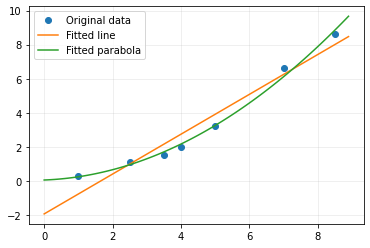

In [45]:
plt.plot(pt_x, pt_y, 'o', label='Original data')

input_x = np.arange(0, 9, .1)
plt.plot(input_x, line_a * input_x + line_b, label='Fitted line')
plt.plot(input_x, parabola_a * input_x ** 2 + parabola_b * input_x + parabola_c, label='Fitted parabola')
plt.grid(alpha=0.25)
plt.legend()

# Properties of the determinant

In [46]:
A, B = [np.random.rand(3, 3) for _ in range(2)]

## $|AB| = |A||B|$

In [47]:
assert_allclose(
    det(A @ B),
    det(A) * det(B)
)

## $|A^{-1}| = \frac{1}{|A|}$

In [48]:
assert_allclose(
    det(inv(A)),
    1 / det(A)
)

## $|A^2|=|A|^2$

In [49]:
assert_allclose(
    det(matrix_power(A, 2)),
    det(A) ** 2
)

## $|2A|=2^n |A|$

In [50]:
assert_allclose(
    det(2 * A),
    2 ** A.shape[0] * det(A)
)

## $|A^T|=|A|$

In [51]:
assert_allclose(
    det(A.T),
    det(A)
)

## $|U|=|A|$

In [52]:
*_, U = LA.lu(A)
assert_allclose(
    abs(det(U)),
    abs(det(A)),
)

## $|Q|=1$

In [53]:
Q_a_unitary_matrix = LA.orth(A)
assert_allclose(
    abs(det(Q_a_unitary_matrix)),
    1,
    atol=0.1
)

# Eigenvalues and eigenvectors

In [54]:
A = create_my_array()
print(A)

[[0.1 0.  0.3]
 [0.2 1.  0.3]
 [0.7 0.  0.4]]


In [55]:
la, S = npLA.eig(A)
print('la', la, '', 'S', S, sep='\n')

la
[-0.2  0.7  1. ]

S
[[ 0.7 -0.3 -0. ]
 [ 0.1  0.8 -1. ]
 [-0.7 -0.5 -0. ]]


## Product of eigenvalues

In [56]:
from functools import reduce
from operator import mul

product_of_eigenvalues = reduce(mul, la)
assert_allclose(
    product_of_eigenvalues,
    det(A)
)

## Sum of eigenvalues

In [57]:
A.trace()

1.4900000000000002

In [58]:
sum_of_eigenvalues = la.sum()
assert_allclose(
    sum_of_eigenvalues,
    A.trace()
)

## Adding to the diagonal adds to lambdas

In [59]:
assert_allclose(
    LA.eigvals(A + 100 * np.identity(3)),
    la + 100
)

## Attributes of a diagonal matrix

In [60]:
D = np.diagflat(np.arange(1, 4))
print(D)

[[1 0 0]
 [0 2 0]
 [0 0 3]]


In [61]:
la, S = LA.eig(D)
print('la', la, '', 'S', S, sep='\n')

la
[1.+0.j 2.+0.j 3.+0.j]

S
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [62]:
def test_in_a_diagonal_matrix_eigenvalues_are_the_ones_on_the_diagonal():
    assert_allclose(
    np.diag(D),
    la
)


test_in_a_diagonal_matrix_eigenvalues_are_the_ones_on_the_diagonal()

In [63]:
def test_in_a_diagonal_matrix_eigenvectors_form_the_identity():
    assert_allclose(
    S,
    np.identity(D.shape[0])
)


test_in_a_diagonal_matrix_eigenvectors_form_the_identity()

## Rotation matrix often has complex lambdas

In [64]:
from numpy import sin, cos

def generate_2_by_2_rotation_matrix(theta):
    return np.array([[cos(theta), -sin(theta)],
                     [sin(theta),  cos(theta)]])


R_90 = generate_2_by_2_rotation_matrix(np.pi / 2)
print(R_90)

[[ 0. -1.]
 [ 1.  0.]]


In [65]:
def test_R_90_is_antisymmetric():
    assert_allclose(
        -R_90.T,
        R_90,
        atol=1e-7
    )


test_R_90_is_antisymmetric()

In [66]:
la = LA.eigvals(R_90)
print(la)

[0.+1.j 0.-1.j]


In [67]:
def test_R_90_has_pure_imaginary_lambdas():
    assert_allclose(
        la.real,
        np.zeros_like(la.real),
        atol=1e-7
    )

test_R_90_has_pure_imaginary_lambdas()

# Diagonalizability

## Algebraic & Geometric Multiplicity

In [68]:
A = create_my_array()
print(A)

[[0.1 0.  0.3]
 [0.2 1.  0.3]
 [0.7 0.  0.4]]


I've used the `eig()` by `numpy.linalg` because it doesn't show _zero_ imaginary parts.

In [69]:
la, S = npLA.eig(A)
print('la', la, '', 'S', S, sep='\n')

la
[-0.2  0.7  1. ]

S
[[ 0.7 -0.3 -0. ]
 [ 0.1  0.8 -1. ]
 [-0.7 -0.5 -0. ]]


In [70]:
from collections import Counter

def compute_algebraic_multiplicities(M: np.ndarray) -> dict:
    return Counter(npLA.eigvals(M))


def compute_geometric_multiplicities(M: np.ndarray) -> dict:
    geo_multiplicities = {}

    for l in npLA.eigvals(M):
        A_minus_lambda_I = M - l * np.identity(M.shape[0])
        eigenspace = LA.null_space(A_minus_lambda_I)
        dim_of_eigenspace = eigenspace.shape[1]

        geo_multiplicities[l] = dim_of_eigenspace

    return geo_multiplicities


def print_alg_and_geo_multiplicities(M: np.ndarray):
    alg_ms = compute_algebraic_multiplicities(M)
    geo_ms = compute_geometric_multiplicities(M)

    print('lambda  ', 'A.M', 'G.M', sep='   ')

    for l in sorted(alg_ms, reverse=True):
        print(f'{l:#8.1f}', f'{alg_ms[l]:#3d}', f'{geo_ms[l]:#3d}', sep='   ')


print_alg_and_geo_multiplicities(A)

lambda     A.M   G.M
     1.0     1     1
     0.7     1     0
    -0.2     1     1


## Defective matrix

Any nontrivial Jordan block of 2×2 or larger (that is, not completely diagonal) is defective (degenerate).

In [71]:
J = np.array([[3, 1],
              [0, 3]])
print(J)

[[3 1]
 [0 3]]


In [72]:
la, S = LA.eig(J)
print('la', la, '', 'S', S, sep='\n')

la
[3.+0.j 3.+0.j]

S
[[ 1. -1.]
 [ 0.  0.]]


In [73]:
assert_allclose(
    npLA.matrix_rank(S),
    1,
    atol=0.1
)

This Jordan matrix has only one eigenvector.

## Diagonalizable matrix


### Normal

A normal matrix is never defective.

#### Hermitian

#### Unitary

# Matrix Power $A^{k}$

## A diagonal matrix

In [74]:
D = np.diagflat(np.arange(1, 4))
print(D)

[[1 0 0]
 [0 2 0]
 [0 0 3]]


In [75]:
k = 2
print(matrix_power(D, k))

[[1 0 0]
 [0 4 0]
 [0 0 9]]


In [76]:
assert_allclose(
    matrix_power(D, k),
    D ** k
)

## Any matrix

In [77]:
A = create_my_array()
print(A)

[[0.1 0.  0.3]
 [0.2 1.  0.3]
 [0.7 0.  0.4]]


If A is diagonalizable, $A^k=SΛ^kS^{-1}$.

In [78]:
la, S = LA.eig(A)
print('la', la, '', 'S', S, sep='\n')

la
[-0.2+0.j  0.7+0.j  1. +0.j]

S
[[ 0.7 -0.3 -0. ]
 [ 0.1  0.8 -1. ]
 [-0.7 -0.5 -0. ]]


In [79]:
k = 2

assert_allclose(
    matrix_power(A, k),
    S @ np.diagflat(la) ** k @ inv(S)
)

# Matrix Exponential $e^{At}$

## A diagonal matrix

In [80]:
D = np.diagflat(np.arange(1, 4))
print(D)

[[1 0 0]
 [0 2 0]
 [0 0 3]]


In [81]:
print(expm(D))

[[ 2.7  0.   0. ]
 [ 0.   7.4  0. ]
 [ 0.   0.  20.1]]


In [82]:
t = 2

assert_allclose(
    expm(D * t),
    np.diagflat(np.e ** (np.diag(D) * t))
)

## Any matrix

In [83]:
A = create_my_array()
print(A)

[[0.1 0.  0.3]
 [0.2 1.  0.3]
 [0.7 0.  0.4]]


If A is diagonalizable, $e^{At}=Se^{Λt}S^{-1}$.

In [84]:
la, S = LA.eig(A)
print('la', la, '', 'S', S, sep='\n')

la
[-0.2+0.j  0.7+0.j  1. +0.j]

S
[[ 0.7 -0.3 -0. ]
 [ 0.1  0.8 -1. ]
 [-0.7 -0.5 -0. ]]


In [85]:
t = 2

assert_allclose(
    expm(A * t),
    S @ expm(np.diagflat(la) * t) @ inv(S)
)

# Systems of difference equations

## Discrete $u_{k}=A^{k}u_{0}$

### e.g. Fibonacci


$f_{0}$ | $f_{1}$ | $f_{2}$ | $f_{3}$ | $f_{4}$ | $f_{5}$ | $f_{6}$ | $f_{7}$ | $...$ | $f_{100}$
:- | :- | :- | :- | :- | :- | :- | :- | :- | :-
0 | 1 | 1 | 2 | 3 | 5 | 8 | 13 | $...$ | ?


$f_{k+2} = f_{k+1} + f_{k} \ \rightarrow \ $ 2nd order differential equation (with 2nd derivative)

"I want to get a two by two system first order, instead of a scalar system second order."

1st order system
$
\ \rightarrow \
\begin{cases}
f_{k+1} + f_{k} = f_{k+2} \\ 
f_{k+1} + 0 = f_{k+1}
\end{cases}
\ \rightarrow \
\begin{bmatrix}
1 & 1 \\
1 & 0
\end{bmatrix}
\begin{bmatrix}
f_{k+1} \\
f_{k}
\end{bmatrix}
=
\begin{bmatrix}
f_{k+2} \\
f_{k+1}
\end{bmatrix}
\ \rightarrow \
\begin{bmatrix}
1 & 1 \\
1 & 0
\end{bmatrix}
u_{k} = u_{k+1}
$

$
\Rightarrow
u_{k+1} = A u_{k}
\ , \
u_{0} =
\begin{bmatrix}
f_{1} \\
f_{0}
\end{bmatrix}
=
\begin{bmatrix}
1 \\
0
\end{bmatrix}
$

$
\Rightarrow
u_{k} = A^{k} u_{0} = S \Lambda^{k} c \ , \ c = S^{-1} u_{0}
$

In [86]:
A = np.array([[1, 1],
              [1, 0]])

u_0 = np.array([1, 0], dtype='float')


def u_by_recursion(k_):
    global A, u_0

    if k_ == 0:
        return u_0
    else:
        return A @ u_by_recursion(k_ - 1)


def u_by_diagonalization(k_):
    global A, u_0

    la_, S_ = npLA.eig(A)

    if k_ == 0:
        return u_0
    else:
        return S_ @ np.diagflat(la_ ** k_) @ inv(S_) @ u_0

In [87]:
def assert_diff_fib_are_close():
    n = 100
    assert_allclose(
        u_by_recursion(n),
        u_by_diagonalization(n)
    )


assert_diff_fib_are_close()

In [88]:
[round(u_by_diagonalization(n)[1]) for n in range(8)]

[0, 1, 1, 2, 3, 5, 8, 13]

In [89]:
print(f'{round(u_by_diagonalization(100)[1]):_}')

354_224_848_179_263_045_632


### Convergence

#### Stability

$\forall i: |\lambda_{i}|<1$

In [90]:
def matrix_power_leads_to_stability(la_):
    return (np.absolute(la_) < .9).all()

tolerance_factor = 1_000_000

def assert_norm_of_last_vector_is_by_far_smaller_than_first_one(v_0, v_last):
    assert_array_less(
        tolerance_factor * LA.norm(v_last),
        LA.norm(v_0)
    )

#### Steady State

$\exists i: |\lambda_{i}|=1, \forall j: |\lambda_{j}| \leq 1$

In [91]:
def matrix_power_leads_to_steady_state(la_):
    return (np.absolute(la_) > .9).any() and (np.absolute(la_) <= 1.1).all()

def assert_norm_of_last_vector_is_not_far_away_than_first_one(v_0, v_last):

    # It doesn't blow up.
    assert_array_less(
        LA.norm(v_last),
        tolerance_factor * LA.norm(v_0)
    )

    # It doesn't lead to stability.
    assert_array_less(
        LA.norm(v_0),
        tolerance_factor * LA.norm(v_last)
    )


#### Blow Up

$\exists i : |\lambda_{i}|>1$

In [92]:
def matrix_power_blows_up(la_):
    return (np.absolute(la_) > 1.1).any()

def assert_norm_of_last_vector_is_by_far_bigger_than_first_one(v_0, v_last):
    try:
        assert_(np.isinf(v_last).any())

    except AssertionError:
        assert_array_less(
            tolerance_factor * LA.norm(v_0),
            LA.norm(v_last)
        )

### Analyze

In [93]:
A = create_my_array()

u_0 = np.ones(A.shape[0])

print('A', A, '', 'u_0', u_0[:, np.newaxis], sep='\n')

A
[[0.1 0.  0.3]
 [0.2 1.  0.3]
 [0.7 0.  0.4]]

u_0
[[1.]
 [1.]
 [1.]]


In [94]:
la = npLA.eigvals(A)
print('la', la, '', sep='\n')

print('la_abs', np.absolute(la), sep='\n')

la
[-0.2  0.7  1. ]

la_abs
[0.2 0.7 1. ]


In [95]:
k = 100
A_to_the_k = matrix_power(A, k)
u_k = A_to_the_k @ u_0

convergence_message = {
    'stability': f'{Styles.GREEN}It is stable!{Styles.END}',
    'steady_state': f'{Styles.YELLOW}It approaches a steady state!{Styles.END}',
    'blow_up': f'{Styles.RED}It blows up!{Styles.END}'
}

convergence_result = ''

if matrix_power_leads_to_stability(la):
    assert_norm_of_last_vector_is_by_far_smaller_than_first_one(u_0, u_k)

    convergence_result = 'stability'

if matrix_power_leads_to_steady_state(la):
    assert_norm_of_last_vector_is_not_far_away_than_first_one(u_0, u_k)

    convergence_result = 'steady_state'

if matrix_power_blows_up(la):
    assert_norm_of_last_vector_is_by_far_bigger_than_first_one(u_0, u_k)

    convergence_result = 'blow_up'

print(convergence_message[convergence_result])

# print('', 'A_to_the_k', A_to_the_k, sep='\n')

print('', 'u_k', u_k[:, np.newaxis], sep='\n')

It approaches a steady state!

u_k
[[0.1]
 [2.9]
 [0.1]]


#### Graph

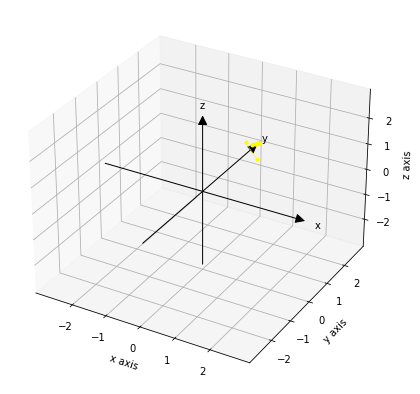

In [96]:
def draw_2d_convergence_graph(x_, y_, color):
    fig, ax = plt.subplots(figsize=(7, 7))

    ax.plot(x_, y_, 'o-', lw=0.5, color=color)

    # Compute max_lim based on plotted data
    x_lim = abs(max(ax.get_xlim(), key=abs))
    y_lim = abs(max(ax.get_ylim(), key=abs))
    max_lim = max(x_lim, y_lim)

    # Position xyz axes to the center
    ax.set_xlim(xmin=-max_lim, xmax=max_lim)
    ax.set_ylim(ymin=-max_lim, ymax=max_lim)

    ax.grid(True, lw=.5)

def draw_3d_convergence_graph(x_, y_, z_, color):
    ax = plt.figure(figsize=(7, 7)).add_subplot(projection='3d')

    ax.plot(x_, y_, z_, '.-', lw=0.5, color=color)

    draw_xyz_axes_at_center(ax)

    ax.set_xlabel('x axis')
    ax.set_ylabel('y axis')
    ax.set_zlabel('z axis')

    plt.show()

def draw_convergence_graph(u_, color):
    if u_.shape[0] == 2:
        draw_2d_convergence_graph(u_[0, :], u_[1, :], color)

    elif u_.shape[0] == 3:
        draw_3d_convergence_graph(u_[0, :], u_[1, :], u_[2, :], color)


graph_color = {
    'stability': 'green',
    'steady_state': 'yellow',
    'blow_up': 'red'
}
u = [u_0]

for i in range(k):
    u.append(A @ u[-1])

# %matplotlib notebook

u = np.array(u).T

draw_convergence_graph(u, graph_color[convergence_result])

## Continuous $u(t)=e^{At}u(0)$

### e.g. A 2×2 system of diff eqs

$
\begin{cases}
\frac{du_{1}}{dt} = -u_{1}+2u_{2} \ , \ u_{1}(0)=1 \ , \ u_{1}(t)=? \\
\\
\frac{du_{2}}{dt} = \ \ \ u_{1}-2u_{2} \ , \ u_{2}(0)=0 \ , \ u_{2}(t)=?
\end{cases}
\\
\
\\
A = 
\begin{bmatrix}
-1 & 2 \\
1 & -2
\end{bmatrix}
\
,
\
u=
\begin{bmatrix}
u_{1} \\
u_{2}
\end{bmatrix}
\
\rightarrow
\
\frac{du}{dt} = Au
\
,
\
u(0)=
\begin{bmatrix}
1 \\
0
\end{bmatrix}
\\
\
\\
u(t)=e^{At}u(0)=Se^{\Lambda t} c \ , \ c = S^{-1} u(0)
$

In [97]:
A = np.array([[-1,  2],
              [ 1, -2]])

u_0 = np.array([1, 0], dtype='float')


def u(t_):
    return expm(A * t_) @ u_0

$
u_{1}(100)=?
\\
u_{2}(100)=?
$

In [98]:
print(u(100).reshape(2, 1))

[[0.7]
 [0.3]]


### e.g. A 2nd order diff eq

$
y^{''}+by^{'}+ky=0
\
\Rightarrow
\
\begin{cases}
y^{''}=-by^{'}-ky
\\
y^{'}= \ \ \ \ \ y^{'}+0
\end{cases}
\
\Rightarrow
\
\begin{bmatrix}
y^{''}
\\
y^{'}
\end{bmatrix}
=
\begin{bmatrix}
-b & -k \\
1 & 0
\end{bmatrix}
\begin{bmatrix}
y^{'}
\\
y
\end{bmatrix}
\
\Rightarrow
\
\frac{du}{dt}=u^{'}=Au
\
\Rightarrow
\
u(t)=e^{At}u(0)
$

### Convergence

#### Stability

$\forall i: Re\lambda_{i}<0$

In [99]:
def matrix_exponential_leads_to_stability(la_):
    return (la_.real <= -0.1).all()

#### Steady State

$\exists i: Re\lambda_{i}=0, \forall j: Re\lambda_{j} \leq 0$

In [100]:
def matrix_exponential_leads_to_steady_state(la_):
    return (la_.real < 0.1).all() and (-0.1 < la_.real).any()

#### Blow Up

$\exists i: Re\lambda_{i}>0$

In [101]:
def matrix_exponential_blows_up(la_):
    return (la_.real >= 0.1).any()

### Analyze

In [102]:
A = create_my_array()

u_0 = np.ones(A.shape[0])

print('A', A, '', 'u_0', u_0[:, np.newaxis], sep='\n')

A
[[0.1 0.  0.3]
 [0.2 1.  0.3]
 [0.7 0.  0.4]]

u_0
[[1.]
 [1.]
 [1.]]


In [103]:
la = npLA.eigvals(A)
print('la', la, sep='\n')

la
[-0.2  0.7  1. ]


In [104]:
t = 100
e_to_the_At = expm(A * t)
u_t = e_to_the_At @ u_0

convergence_result = ''

if matrix_exponential_leads_to_stability(la):
    assert_norm_of_last_vector_is_by_far_smaller_than_first_one(u_0, u_t)

    convergence_result = 'stability'

if matrix_exponential_leads_to_steady_state(la):
    assert_norm_of_last_vector_is_not_far_away_than_first_one(u_0, u_t)

    convergence_result = 'steady_state'

if matrix_exponential_blows_up(la):
    assert_norm_of_last_vector_is_by_far_bigger_than_first_one(u_0, u_t)

    convergence_result = 'blow_up'

print(convergence_message[convergence_result])

# print('', 'e_to_the_At', e_to_the_At, sep='\n')

print('', 'u_t', u_t[:, np.newaxis], sep='\n')

It blows up!

u_t
[[1.4e+42]
 [7.8e+43]
 [1.6e+42]]


#### Graph

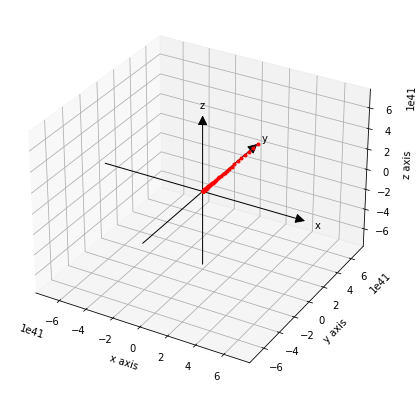

In [105]:
u = [u_0]

dt = .1
for i in range(int(t / dt)):
    du = A @ u[-1] * dt
    u.append(u[-1] + du)

u = np.array(u).T
draw_convergence_graph(u, graph_color[convergence_result])

# Markov matrix

In [106]:
A = create_a_Markov_matrix()
print(A)

[[0.1 0.  0.3]
 [0.2 1.  0.3]
 [0.7 0.  0.4]]


In [107]:
la, S = npLA.eig(A)
print('la', la, '', 'S', S, sep='\n')

la
[-0.2  0.7  1. ]

S
[[ 0.7 -0.3 -0. ]
 [ 0.1  0.8 -1. ]
 [-0.7 -0.5 -0. ]]


## All entries are 0 or positive

In [108]:
def assert_all_entries_are_0_or_positive(M):
    assert_(
        (M >= 0).all()
    )


assert_all_entries_are_0_or_positive(A)

## All columns add to 1

In [109]:
def assert_all_columns_add_to_1(M):
    assert_allclose(
        np.sum(M, axis=0).all(),
        1
    )


assert_all_columns_add_to_1(A)

## $\exists i: \lambda_{i} = 1$

In [110]:
def assert_at_least_an_eigenvalue_is_close_to_1(la_):
    assert_(
        np.isclose(la_, 1).any()
    )


assert_at_least_an_eigenvalue_is_close_to_1(la)

## $\forall j \ne i , |\lambda_{j}| \leq 1$

In [111]:
def assert_all_eigenvalues_are_less_than_or_close_to_1(la_):
    assert_array_less(
        np.absolute(la_),
        np.full_like(la_, 1.1),
    )


assert_all_eigenvalues_are_less_than_or_close_to_1(la)

## It converges to a positive steady state

In [112]:
k = 100
A_to_the_k = matrix_power(A, k)

u_0 = np.ones(A.shape[0])
u_k = A_to_the_k @ u_0

la = npLA.eigvals(A_to_the_k)

assert_array_less(np.zeros_like(u_k), u_k)
assert_norm_of_last_vector_is_not_far_away_than_first_one(u_0, u_k)

## $A^{k}$ is still Markov

In [113]:
assert_all_entries_are_0_or_positive(A_to_the_k)
assert_all_columns_add_to_1(A_to_the_k)
assert_at_least_an_eigenvalue_is_close_to_1(la)
assert_all_eigenvalues_are_less_than_or_close_to_1(la)

# Expansion with a basis

In [114]:
v = np.array([1, 2, 3])
print('Vector', v, sep='\n')

Vector
[1 2 3]


## With A

In [115]:
A = create_a_square_invertible_array()
print(A)

[[1 2 1]
 [3 8 1]
 [0 4 1]]


In [116]:
x = inv(A.T @ A) @ A.T @ v
print(x)

[-1.   0.5  1. ]


In [117]:
assert_allclose(
    A @ x,
    v
)

## With Q (orthonormal basis)

In [118]:
Q = LA.orth(A)
print(Q)

[[-0.2  0.1  1. ]
 [-0.9  0.4 -0.3]
 [-0.4 -0.9 -0. ]]


In [119]:
x = Q.T @ v
print('Cofactors on Q', x, sep='\n')

Cofactors on Q
[-3.2 -1.9  0.4]


In [120]:
assert_allclose(
    Q @ x,
    v
)

## With S (eigenvectors)

In [121]:
la, S = npLA.eig(A)
print('la', la, '', 'S', S, sep='\n')

la
[9.4+0.j 0.3+1.j 0.3-1.j]

S
[[ 0.3+0.j   0. -0.5j  0. +0.5j]
 [ 0.9+0.j  -0.1+0.2j -0.1-0.2j]
 [ 0.4+0.j   0.8+0.j   0.8-0.j ]]


In [122]:
x = inv(S.T @ S) @ S.T @ v
print(x)

[2.8-0.j  1.2+0.2j 1.2-0.2j]


In [123]:
assert_allclose(
    S @ (x * la),
    A @ v
)

# Next